## Build training and testing dataset of assignment 1 to predict the 
## probability of a survival of
## a person based on gender, age and passenger-class

## IMP Necessary Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMport the dataset

In [120]:
df = sns.load_dataset('titanic')
#df = pd.read_csv('https://github.com/datasciencedojo/datasets/blob/master/titanic.csv')

In [121]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [122]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [123]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Seperate the Input and Output Data

In [124]:
x = df[['pclass', 'sex', 'age']]
y = df['survived']

In [125]:
x

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [126]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Label Encode the String Data

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()

In [129]:
x['sex'] = le.fit_transform(x['sex'])

In [130]:
x

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [131]:
x.shape

(891, 3)

In [132]:
x.isnull().sum()

pclass      0
sex         0
age       177
dtype: int64

In [133]:
x.fillna(method = 'pad', inplace = True)

In [134]:
x.isnull().sum()

pclass    0
sex       0
age       0
dtype: int64

In [135]:
x.describe()

,pclass,sex,age
count,891.000000,891.000000,891.00000
mean,2.308642,0.647587,29.58156
std,0.836071,0.477990,14.55459
min,1.000000,0.000000,0.42000
25%,2.000000,0.000000,20.00000
50%,3.000000,1.000000,28.00000
75%,3.000000,1.000000,38.00000
max,3.000000,1.000000,80.00000


In [136]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [137]:
set(y)

{0, 1}

In [138]:
np.unique(y)

array([0, 1])

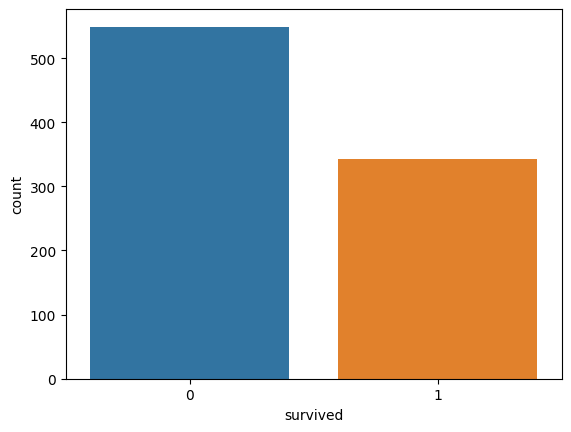

In [139]:
sns.countplot(x=y);

In [140]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [141]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

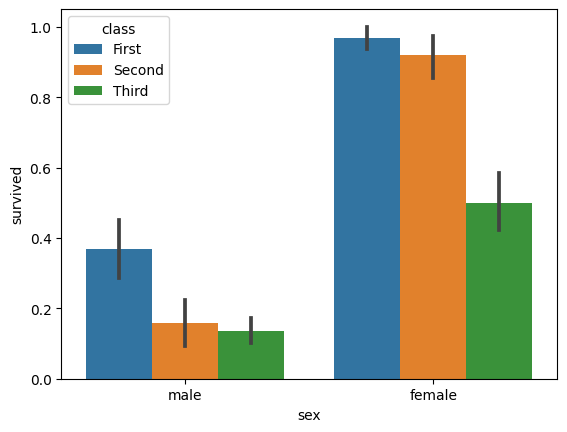

In [142]:
sns.barplot(x = 'sex', y = 'survived', data = df, hue = 'class')

## Normalization 

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
x_scaled = scaler.fit_transform(x)

In [146]:
x_scaled.shape

(891, 3)

In [147]:
x_scaled

array([[ 0.82737724,  0.73769513, -0.52119766],
       [-1.56610693, -1.35557354,  0.57872934],
       [ 0.82737724, -1.35557354, -0.24621591],
       ...,
       [ 0.82737724, -1.35557354, -0.72743397],
       [-1.56610693,  0.73769513, -0.24621591],
       [ 0.82737724,  0.73769513,  0.16625671]])

In [148]:
pd.DataFrame(x_scaled).describe()

,0,1,2
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,-1.156327e-16,1.634807e-16
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-1.355574e+00,-2.004724e+00
25%,-3.693648e-01,-1.355574e+00,-6.586885e-01
50%,8.273772e-01,7.376951e-01,-1.087250e-01
75%,8.273772e-01,7.376951e-01,5.787293e-01
max,8.273772e-01,7.376951e-01,3.466038e+00


## Cross Validation (Training and Assessment Mode)

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state = 0, test_size = 0.25)

In [151]:
x_train.shape

(668, 3)

In [152]:
x_test.shape

(223, 3)

In [153]:
# sample = pd.DataFrame((
#     'actual': [1,0,0,1,1,0,1,0,1,1],
#     'predicted': [1,1,0,1,0,0,1,0,1,0]
# ))

In [154]:
#sample

In [155]:
#sum(sample['actual'] == sample['predicted'])

In [156]:
True + True

2

In [157]:
# len(sample)

In [158]:
sum(result['actual'] == result['predicted'])/len(result)

0.7802690582959642

In [159]:
x.columns

Index(['pclass', 'sex', 'age'], dtype='object')

## Build the Model 

In [160]:
# Import The Class 
from sklearn.linear_model import LogisticRegression

In [161]:
# Create the object
clf = LogisticRegression()

In [162]:
# Train the Algorithm
clf.fit(x_train, y_train)

LogisticRegression()

In [163]:
import numpy as np

In [164]:
np.array

<function numpy.array>

In [165]:
def sigmoid(z):
    val = 1/(1 + np.exp9-z)
    return val

In [168]:
# plt.plot(x,sigmoid(x))

In [169]:
# sigmoid()

## Performance Evaluation 

In [170]:
y_pred = clf.predict(x_test)

In [171]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [172]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: survived, Length: 223, dtype: int64

In [173]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [174]:
result.shape

(223, 2)

In [175]:
result

,actual,predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


In [176]:
result['actual'] == result['predicted']

495    True
648    True
278    True
31     True
255    True
       ... 
167    True
306    True
379    True
742    True
10     True
Length: 223, dtype: bool

In [177]:
sum(result['actual'] == result['predicted'])

174

In [178]:
sum(result['actual'] == result['predicted'])/len(result) * 100

78.02690582959642

In [179]:
x.columns

Index(['pclass', 'sex', 'age'], dtype='object')

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
new1 = [[1,0,35]]
new1 = scaler.transform(new1)

In [182]:
clf.predict_proba(new1)

array([[0.09361778, 0.90638222]])

In [183]:
clf.predict_proba(new1)[0][1]

0.9063822217940697

In [184]:
clf.predict(new1)[0]

1

In [185]:
clf.predict_proba(x_test)

array([[0.87924179, 0.12075821],
       [0.95279545, 0.04720455],
       [0.8288379 , 0.1711621 ],
       [0.10673083, 0.89326917],
       [0.40894169, 0.59105831],
       [0.3441299 , 0.6558701 ],
       [0.10673083, 0.89326917],
       [0.08418704, 0.91581296],
       [0.50627611, 0.49372389],
       [0.63059445, 0.36940555],
       [0.8938735 , 0.1061265 ],
       [0.25232871, 0.74767129],
       [0.95534794, 0.04465206],
       [0.11429451, 0.88570549],
       [0.06973941, 0.93026059],
       [0.30888637, 0.69111363],
       [0.88529271, 0.11470729],
       [0.70861303, 0.29138697],
       [0.9163016 , 0.0836984 ],
       [0.79990827, 0.20009173],
       [0.70256136, 0.29743864],
       [0.06605287, 0.93394713],
       [0.82041304, 0.17958696],
       [0.57845435, 0.42154565],
       [0.36071316, 0.63928684],
       [0.10673083, 0.89326917],
       [0.90935032, 0.09064968],
       [0.36071316, 0.63928684],
       [0.17898792, 0.82101208],
       [0.23959125, 0.76040875],
       [0.

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(y_test, y_pred)

0.7802690582959642